# Simplifying Data With The Douglas-Peucker Algorithm

In [1]:
import os
import tarfile
import glob

import plio
import libpysat
import math

import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd


In [2]:
"# To get a dataframe of the data\n",
import os
files = glob.glob('*.spc')
d = {}
for f in files:
    s = libpysat.data.spectra.Spectra.from_file(f)
    ref1s = s.xs('REF1', level=1, axis=1)
    break

/home/cole/miniconda3/envs/pokemon/lib/python3.6/site-packages/libpysat-0.1.0-py3.6.egg/libpysat/data/io.py:21: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  geo_data = io_spectral_profiler.Spectral_Profiler(f)


In [3]:
ref1s.data

id,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
major,,,,,,,,,,,,,,,,,,,,,
512.6,0.0000,0.0016,0.0031,0.0031,0.0000,0.0016,0.0000,0.0000,0.0000,0.0000,...,0.0015,0.0000,0.0000,0.0015,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000
518.4,0.0034,0.0017,0.0034,0.0017,0.0000,0.0000,0.0017,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0034,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0017
524.7,0.0000,0.0016,0.0032,0.0000,0.0000,0.0000,0.0016,0.0016,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0016,0.0016,0.0016,0.0000,0.0000,0.0000,0.0000
530.4,0.0032,0.0016,0.0016,0.0000,0.0000,0.0000,0.0016,0.0000,0.0000,0.0016,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0015
536.5,0.0000,0.0000,0.0016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0031,0.0000,...,0.0015,0.0015,0.0000,0.0000,0.0015,0.0000,0.0000,0.0000,0.0015,0.0000
542.8,0.0000,0.0000,0.0032,0.0032,0.0000,0.0000,0.0000,0.0000,0.0016,0.0016,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
548.7,0.0000,0.0000,0.0016,0.0000,0.0000,0.0000,0.0016,0.0000,0.0016,0.0000,...,0.0047,0.0031,0.0000,0.0000,0.0016,0.0016,0.0016,0.0000,0.0000,0.0000
554.5,0.0000,0.0000,0.0016,0.0016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
560.5,0.0032,0.0000,0.0016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0016,0.0000,0.0000,0.0016,0.0016,0.0032,0.0000,0.0016,0.0000,0.0000


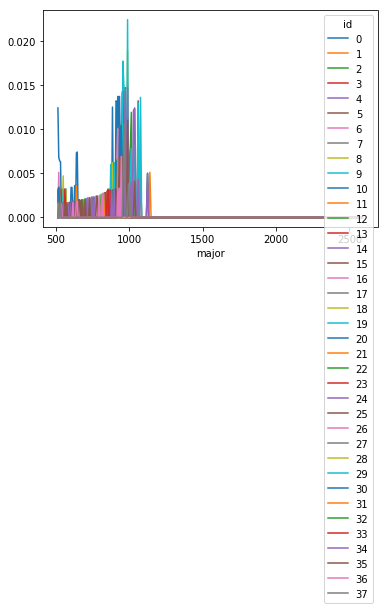

In [4]:
ref1s.data.plot()

In [5]:
def DouglasPeucker(df, index_list, epsilon=0.000000000000000000000):
    dmax = 0
    index = 0
    end = len(index_list) - 1
    
    for i in range(1, end - 1):
        d = distance( (index_list[i], df.loc[index_list[i]]), (index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]]) ) 
        if ( d > dmax ):
            index = i
            dmax = d
            
    if ( dmax > epsilon ):
        recResults1 = DouglasPeucker(df, index_list[0:index], epsilon)
        recResults2 = DouglasPeucker(df, index_list[index:end + 1], epsilon)
        ResultList = recResults1 + recResults2
    else:
        ResultList = [(index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]])]
        
    return ResultList

def convert(df, index_list):
    returnVal = pd.DataFrame( columns = ['0'] )
    for pair in index_list:
        returnVal.loc[pair[0]] = [pair[1]]
    return returnVal
    
def distance(point, start, end):
    numerator = abs((end[1] - start[1]) * point[0] - (end[0] - start[0]) * point[1] + end[0]* start[1] - end[1]*start[0])
    denominator = math.sqrt( (end[1]-start[1])*(end[1]-start[1]) + (end[0] - start[0])*(end[0] - start[0]) )
    return numerator/denominator

In [6]:
indices_to_keep = DouglasPeucker(ref1s.data.iloc[:, 2], ref1s.data.index )
newline = convert(ref1s.data.iloc[:, 2], indices_to_keep)

Before Simplification:  269


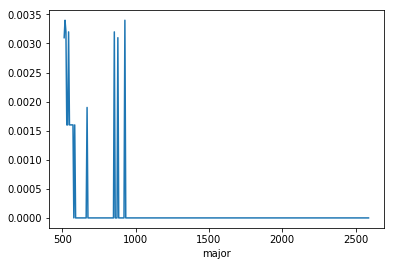

In [7]:
print('Before Simplification: ', len(ref1s.data.index))
ref1s.data.iloc[:, 2].plot()

After Simplification:  23


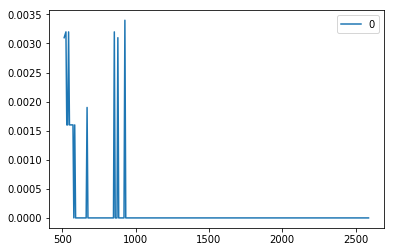

In [8]:
print('After Simplification: ', len(newline.index))
newline.plot()

# Average Simplification of Observations For Arbitrary Image

In [10]:
original_plots = []
reduced_plots = []

In [11]:
for i in range(0,38):
    indices_to_keep = DouglasPeucker(ref1s.data.iloc[:, i], ref1s.data.index )
    newline = convert(ref1s.data.iloc[:, i], indices_to_keep)
    original_plots.append(ref1s.data.iloc[:, i])
    reduced_plots.append(newline)

In [12]:
average_reduction = 0
for df in reduced_plots:
    average_reduction += len(df)
print('From 269 to', average_reduction/len(reduced_plots))

From 269 to 29.710526315789473


id 37 reduced to 15


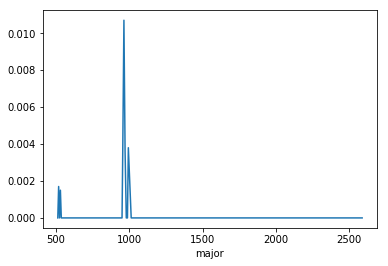

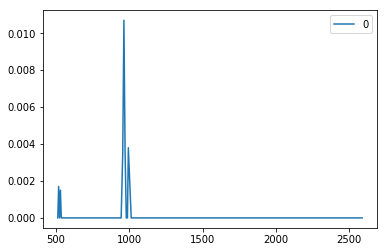

In [19]:
# In case you want to compare how any specific observation reduces and how the plots compare
i = 37
original_plots[i].plot()
reduced_plots[i].plot()
print('id',i,'reduced to',len(reduced_plots[i]))